<a href="https://colab.research.google.com/github/agustinperalta/Diplodatos-g18/blob/main/G18_Practico_2_Entregable_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2022*

----
### *Grupo N°:* 18

### *Integrantes:*
#### Parada Larrosa, Francisco
#### Peralta, Agustín
####  Porcel, Carolina
####  Quiros, Agustina

# Trabajo práctico entregable - parte 2


En el ejercicio 2 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad e imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.** que fue guardado en un archivo (Ejercicio 3 entregable 1). 


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context('talk')

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [4]:
# Acá deberían leer el conjunto de datos que ya tienen.
melb_df = pd.read_csv(
    'https://raw.githubusercontent.com/agustinperalta/Diplodatos-g18/main/resultado_ej3_practico2_entrega1_.csv')
melb_df[:3]

,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Suburb,Propertycount,Postcode,zipcode,price_airbnb,weekly_price,monthly_price
0,h,1480000.0,2.5,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,Abbotsford,4019.0,3067.0,3067.0,100.0,380.0,1440.0
1,h,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,Abbotsford,4019.0,3067.0,3067.0,100.0,380.0,1440.0
2,h,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,Abbotsford,4019.0,3067.0,3067.0,100.0,380.0,1440.0


# Ejercicio 0: Imputación

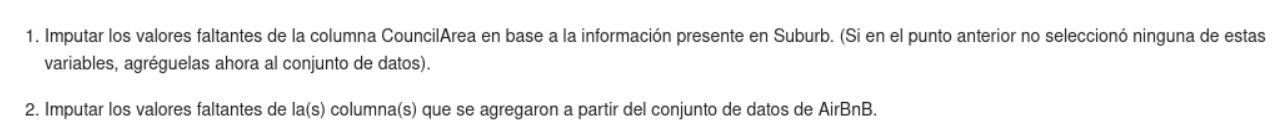

**1. Imputación de valores faltantes con información del mismo Dataset**

In [5]:
df_airbnb_comp = pd.read_csv('https://raw.githubusercontent.com/agustinperalta/Diplodatos-g18/main/suburb_councilarea.csv')

In [6]:
# Contamos la cantidad de valores faltantes de la variable CouncilArea
melb_df.CouncilArea.isnull().value_counts()

False    11957
True      1353
Name: CouncilArea, dtype: int64

In [7]:
df_comp = melb_df[~melb_df['CouncilArea'].isnull()][['Suburb','CouncilArea']].drop_duplicates()


In [8]:
# Realizamos la imputación a partir de la información en la variable Suburb
i=-1
n = 0
for  row  in melb_df['CouncilArea']:
  i = i+1
  if pd.isna(row):
    j=-1
    for row2 in df_comp['Suburb']:
      j = j+1
      council = df_comp.iloc[j]['CouncilArea']
      if row2 == melb_df.iloc[i]['Suburb']:
       melb_df.at[i, 'CouncilArea']= council
       n = n+1
       break

In [9]:
melb_df[melb_df['CouncilArea'].isnull()]

,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Suburb,Propertycount,Postcode,zipcode,price_airbnb,weekly_price,monthly_price
11995,h,657500.0,14.8,3.0,2.0,2.0,631.0,NaN,NaN,NaN,Burnside,1607.0,3023.0,3023.0,71.0,500.0,NaN
12181,h,640000.0,16.5,3.0,2.0,2.0,607.0,NaN,NaN,NaN,Attwood,1130.0,3049.0,NaN,NaN,NaN,NaN
12601,h,366000.0,44.2,3.0,1.0,1.0,502.0,77.0,1978.0,NaN,Wallan,3988.0,3756.0,NaN,NaN,NaN,NaN
12978,h,1355000.0,48.1,5.0,3.0,5.0,44500.0,44515.0,NaN,NaN,New Gisborne,849.0,3438.0,NaN,NaN,NaN,NaN
12997,h,625500.0,23.8,4.0,2.0,2.0,477.0,178.0,2012.0,NaN,Plumpton,1490.0,3335.0,NaN,NaN,NaN,NaN
13113,h,580000.0,14.8,3.0,2.0,2.0,461.0,174.0,2000.0,NaN,Burnside,1607.0,3023.0,3023.0,71.0,500.0,NaN
13224,h,720000.0,34.1,4.0,2.0,2.0,1611.0,NaN,NaN,NaN,Monbulk,1424.0,3793.0,NaN,NaN,NaN,NaN


**1. Imputación con información del Dataset AirBnB**

Como aún nos quedan 7 registros sin información, acudimos a la base de AirBnB para imputarlos.

In [10]:
df_airbnb_comp

,suburb,council_area,frequency,frequency_order
0,abbotsford,yarra,257,1
1,"abbotsford, melbourne",yarra,1,1
2,aberfeldie,moonee valley,4,1
3,airport west,moonee valley,22,1
4,albanvale,brimbank,1,1
...,...,...,...,...
518,yering,yarra ranges,2,1
519,yuroke,hume,1,1
520,墨尔本,manningham,3,1
521,墨爾本 melbourne,melbourne,1,1


In [11]:
i=-1
n = 0
for  row  in melb_df['CouncilArea']:
  i = i+1
  if pd.isna(row):
    j=-1
    for row2 in df_airbnb_comp['suburb']:
      j = j+1
      council = df_airbnb_comp.iloc[j]['council_area']
      if row2 == melb_df.iloc[i]['Suburb'].lower():
       melb_df.at[i, 'CouncilArea']= council
       n = n+1
       break

In [12]:
# Luego de ambas imputaciones sólo nos quedan 2 registros sin información para la variable CouncilArea
melb_df[melb_df['CouncilArea'].isnull()]

,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Suburb,Propertycount,Postcode,zipcode,price_airbnb,weekly_price,monthly_price
12601,h,366000.0,44.2,3.0,1.0,1.0,502.0,77.0,1978.0,NaN,Wallan,3988.0,3756.0,NaN,NaN,NaN,NaN
12978,h,1355000.0,48.1,5.0,3.0,5.0,44500.0,44515.0,NaN,NaN,New Gisborne,849.0,3438.0,NaN,NaN,NaN,NaN


In [13]:
melb_df.CouncilArea.value_counts()

Moreland             1229
Boroondara           1220
Moonee Valley        1064
Darebin               991
Glen Eira             875
Stonnington           712
Maribyrnong           705
Yarra                 679
Port Phillip          656
Banyule               645
Bayside               537
Melbourne             473
Brimbank              468
Hobsons Bay           464
Monash                407
Whitehorse            371
Manningham            358
Kingston              277
Hume                  243
Whittlesea            221
Wyndham               122
Maroondah             115
Knox                  110
Melton                 81
Frankston              78
Greater Dandenong      64
Nillumbik              51
Casey                  46
Yarra Ranges           22
Macedon Ranges         10
Cardinia                8
melton                  3
Unavailable             1
hume                    1
yarra ranges            1
Name: CouncilArea, dtype: int64

## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


**1. Selección de filas y columnas, excepto BuildingArea y YearBuilt**

In [14]:
melb_df.columns.to_list()
#elem for elem in my_list if elem == 'two'
interesting_cols = [col for col in melb_df.columns.to_list() if col not in ('BuildingArea','YearBuilt')]

In [15]:
melb_df_original = melb_df.copy()
melb_df_e1 = melb_df[interesting_cols]
melb_df_e1

,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Suburb,Propertycount,Postcode,zipcode,price_airbnb,weekly_price,monthly_price
0,h,1480000.0,2.5,2.0,1.0,1.0,202.0,Yarra,Abbotsford,4019.0,3067.0,3067.0,100.0,380.0,1440.0
1,h,1035000.0,2.5,2.0,1.0,0.0,156.0,Yarra,Abbotsford,4019.0,3067.0,3067.0,100.0,380.0,1440.0
2,h,1465000.0,2.5,3.0,2.0,0.0,134.0,Yarra,Abbotsford,4019.0,3067.0,3067.0,100.0,380.0,1440.0
3,h,850000.0,2.5,3.0,2.0,1.0,94.0,Yarra,Abbotsford,4019.0,3067.0,3067.0,100.0,380.0,1440.0
4,h,1600000.0,2.5,3.0,1.0,2.0,120.0,Yarra,Abbotsford,4019.0,3067.0,3067.0,100.0,380.0,1440.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13305,h,1245000.0,16.7,4.0,2.0,2.0,652.0,Monash,Wheelers Hill,7392.0,3150.0,3150.0,80.0,405.0,1490.5
13306,h,1031000.0,6.8,3.0,2.0,2.0,333.0,Hobsons Bay,Williamstown,6380.0,3016.0,3016.0,180.0,599.5,2095.0
13307,h,1170000.0,6.8,3.0,2.0,4.0,436.0,Hobsons Bay,Williamstown,6380.0,3016.0,3016.0,180.0,599.5,2095.0
13308,h,2500000.0,6.8,4.0,1.0,5.0,866.0,Hobsons Bay,Williamstown,6380.0,3016.0,3016.0,180.0,599.5,2095.0


**2. Codificación One-Hot encoding**

Seleccionamos las variables categóricas: Type, CouncilArea y Suburb

La opción que utilizaremos es con DictVectorizer

In [16]:
enconding_cols = [col for col in melb_df_e1.columns.to_list() if col in ('Type','CouncilArea','Suburb')]

In [17]:
feature_dict = list(melb_df_e1[enconding_cols].T.to_dict().values())
feature_dict[:2]

[{'CouncilArea': 'Yarra', 'Suburb': 'Abbotsford', 'Type': 'h'},
 {'CouncilArea': 'Yarra', 'Suburb': 'Abbotsford', 'Type': 'h'}]

In [18]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
feature_matrix = vec.fit_transform(feature_dict)

In [19]:
#Nueva matriz 
feature_matrix

<13310x352 sparse matrix of type '<class 'numpy.float64'>'
	with 39930 stored elements in Compressed Sparse Row format>

In [20]:
#Devuelve las columnas de la nueva matriz, por cada valor posible de variable categorica tenemos una variable(columna)
vec.get_feature_names()[:] 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['CouncilArea',
 'CouncilArea=Banyule',
 'CouncilArea=Bayside',
 'CouncilArea=Boroondara',
 'CouncilArea=Brimbank',
 'CouncilArea=Cardinia',
 'CouncilArea=Casey',
 'CouncilArea=Darebin',
 'CouncilArea=Frankston',
 'CouncilArea=Glen Eira',
 'CouncilArea=Greater Dandenong',
 'CouncilArea=Hobsons Bay',
 'CouncilArea=Hume',
 'CouncilArea=Kingston',
 'CouncilArea=Knox',
 'CouncilArea=Macedon Ranges',
 'CouncilArea=Manningham',
 'CouncilArea=Maribyrnong',
 'CouncilArea=Maroondah',
 'CouncilArea=Melbourne',
 'CouncilArea=Melton',
 'CouncilArea=Monash',
 'CouncilArea=Moonee Valley',
 'CouncilArea=Moreland',
 'CouncilArea=Nillumbik',
 'CouncilArea=Port Phillip',
 'CouncilArea=Stonnington',
 'CouncilArea=Unavailable',
 'CouncilArea=Whitehorse',
 'CouncilArea=Whittlesea',
 'CouncilArea=Wyndham',
 'CouncilArea=Yarra',
 'CouncilArea=Yarra Ranges',
 'CouncilArea=hume',
 'CouncilArea=melton',
 'CouncilArea=yarra ranges',
 'Suburb=Abbotsford',
 'Suburb=Aberfeldie',
 'Suburb=Airport West',
 'Suburb=Alb

In [21]:
# Fill nan values on sparse matrix.
if np.any(np.isnan(feature_matrix.data)):
  feature_matrix.data = np.nan_to_num(feature_matrix.data)

In [22]:
print(feature_matrix)

  (0, 31)	1.0
  (0, 36)	1.0
  (0, 349)	1.0
  (1, 31)	1.0
  (1, 36)	1.0
  (1, 349)	1.0
  (2, 31)	1.0
  (2, 36)	1.0
  (2, 349)	1.0
  (3, 31)	1.0
  (3, 36)	1.0
  (3, 349)	1.0
  (4, 31)	1.0
  (4, 36)	1.0
  (4, 349)	1.0
  (5, 31)	1.0
  (5, 36)	1.0
  (5, 349)	1.0
  (6, 31)	1.0
  (6, 36)	1.0
  (6, 349)	1.0
  (7, 31)	1.0
  (7, 36)	1.0
  (7, 349)	1.0
  (8, 31)	1.0
  :	:
  (13301, 349)	1.0
  (13302, 1)	1.0
  (13302, 331)	1.0
  (13302, 349)	1.0
  (13303, 30)	1.0
  (13303, 333)	1.0
  (13303, 349)	1.0
  (13304, 12)	1.0
  (13304, 336)	1.0
  (13304, 349)	1.0
  (13305, 21)	1.0
  (13305, 337)	1.0
  (13305, 349)	1.0
  (13306, 11)	1.0
  (13306, 340)	1.0
  (13306, 349)	1.0
  (13307, 11)	1.0
  (13307, 340)	1.0
  (13307, 349)	1.0
  (13308, 11)	1.0
  (13308, 340)	1.0
  (13308, 349)	1.0
  (13309, 17)	1.0
  (13309, 348)	1.0
  (13309, 349)	1.0


In [23]:
# Before doing this type of conversion, it's mandatory to calculate the
# size of the resulting matrix!
matrix_size_mb = feature_matrix.shape[0] * feature_matrix.shape[1] * 4 / 1024 / 1024
print("The dense matrix will weight approximately {:.2f} MB".format(matrix_size_mb))

limit_size_mb = 10
precision_type = np.float32
if matrix_size_mb < limit_size_mb:  # Matrix is less than 10MB
  dense_feature_matrix = feature_matrix.astype(precision_type).todense()
else:
  # We calculate how many rows would fit given the number of columns
  n_rows = int(limit_size_mb *1024 * 1024 / 4 / feature_matrix.shape[1])
  print("Matrix too big! Using only first {} of {} rows".format(
      n_rows, feature_matrix.shape[0]))
  dense_feature_matrix = feature_matrix[:n_rows].astype(precision_type).todense()

print("Final size: {:.2f}".format(dense_feature_matrix.nbytes / 1024 / 1024))

The dense matrix will weight approximately 17.87 MB
Matrix too big! Using only first 7447 of 13310 rows
Final size: 10.00


In [24]:
# Cantidad de columnas de nuestra nueva matriz
dense_feature_matrix.shape[1]

352

In [25]:
dense_feature_matrix[0,:]

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

Procedemos a convertir esta matriz nuevamente en un Dataframe

Según se nos sugiere, debemos trabajar con menos registros por una cuestión de espacio de la herramienta utilizada. Nos indica recortar los registros a 7447.

(Consideramos a los fines de este entregable continuar con lo sugerido pero sabiendo que en un caso real lo conveniente sería trabajar con menos columnas para que esto no suceda y dejar tanta cantidad de datos afuera)

In [26]:
len(melb_df_e1)

13310

In [27]:
# Recortamos también nuestra matriz original
if dense_feature_matrix.shape[0] < len(melb_df_e1):
  melb_df_sample = melb_df_e1.iloc[:dense_feature_matrix.shape[0]]
else:
  melb_df_sample = melb_df_e1

In [28]:
numerical_cols = melb_df_sample[['Price','Distance','Bedroom2','Bathroom','Car','Landsize','Propertycount','Postcode','price_airbnb','weekly_price','monthly_price']].values


In [29]:
from sklearn.preprocessing import MaxAbsScaler
transformer = MaxAbsScaler().fit(numerical_cols)
numerical_cols = transformer.transform(numerical_cols)

In [30]:
columns_name = vec.get_feature_names()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [31]:
columns_name = np.concatenate((vec.get_feature_names(), ['Price','Distance','Bedroom2','Bathroom','Car','Landsize','Propertycount','Postcode','price_airbnb','weekly_price','monthly_price']))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [32]:
columns_name

array(['CouncilArea', 'CouncilArea=Banyule', 'CouncilArea=Bayside',
       'CouncilArea=Boroondara', 'CouncilArea=Brimbank',
       'CouncilArea=Cardinia', 'CouncilArea=Casey', 'CouncilArea=Darebin',
       'CouncilArea=Frankston', 'CouncilArea=Glen Eira',
       'CouncilArea=Greater Dandenong', 'CouncilArea=Hobsons Bay',
       'CouncilArea=Hume', 'CouncilArea=Kingston', 'CouncilArea=Knox',
       'CouncilArea=Macedon Ranges', 'CouncilArea=Manningham',
       'CouncilArea=Maribyrnong', 'CouncilArea=Maroondah',
       'CouncilArea=Melbourne', 'CouncilArea=Melton',
       'CouncilArea=Monash', 'CouncilArea=Moonee Valley',
       'CouncilArea=Moreland', 'CouncilArea=Nillumbik',
       'CouncilArea=Port Phillip', 'CouncilArea=Stonnington',
       'CouncilArea=Unavailable', 'CouncilArea=Whitehorse',
       'CouncilArea=Whittlesea', 'CouncilArea=Wyndham',
       'CouncilArea=Yarra', 'CouncilArea=Yarra Ranges',
       'CouncilArea=hume', 'CouncilArea=melton',
       'CouncilArea=yarra ranges

In [33]:
encoded_df = pd.DataFrame(np.hstack((dense_feature_matrix,numerical_cols)),columns=columns_name)

In [34]:
encoded_df.head(10)

,CouncilArea,CouncilArea=Banyule,CouncilArea=Bayside,CouncilArea=Boroondara,CouncilArea=Brimbank,CouncilArea=Cardinia,CouncilArea=Casey,CouncilArea=Darebin,CouncilArea=Frankston,CouncilArea=Glen Eira,...,Distance,Bedroom2,Bathroom,Car,Landsize,Propertycount,Postcode,price_airbnb,weekly_price,monthly_price
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.166667,0.10,0.125,0.125,0.002690,0.185635,0.956345,0.555556,0.292308,0.266667
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.166667,0.10,0.125,0.000,0.002077,0.185635,0.956345,0.555556,0.292308,0.266667
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.166667,0.15,0.250,0.000,0.001784,0.185635,0.956345,0.555556,0.292308,0.266667
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.166667,0.15,0.250,0.125,0.001252,0.185635,0.956345,0.555556,0.292308,0.266667
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.166667,0.15,0.125,0.250,0.001598,0.185635,0.956345,0.555556,0.292308,0.266667
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.166667,0.10,0.125,0.000,0.002410,0.185635,0.956345,0.555556,0.292308,0.266667
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.166667,0.20,0.250,0.000,0.003262,0.185635,0.956345,0.555556,0.292308,0.266667
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.166667,0.10,0.125,0.250,0.003409,0.185635,0.956345,0.555556,0.292308,0.266667
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.166667,0.05,0.125,0.125,0.000000,0.185635,0.956345,0.555556,0.292308,0.266667
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.166667,0.15,0.125,0.250,0.002929,0.185635,0.956345,0.555556,0.292308,0.266667


## Ejercicio 2: Encoding

En el teórico se presentó el método IterativeImputer para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas YearBuilt y BuildingArea.

2. Aplique una instancia de IterativeImputer con un estimador KNeighborsRegressor para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?

3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

**1. Agregamos a nuestro nuevo Dataframe las variables BuildingArea y YearBuilt**


In [35]:
print(len(melb_df_sample))

7447


In [36]:
#Df sin esas variables y con los valores imputados para CouncilArea
melb_df_sample.head()

,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Suburb,Propertycount,Postcode,zipcode,price_airbnb,weekly_price,monthly_price
0,h,1480000.0,2.5,2.0,1.0,1.0,202.0,Yarra,Abbotsford,4019.0,3067.0,3067.0,100.0,380.0,1440.0
1,h,1035000.0,2.5,2.0,1.0,0.0,156.0,Yarra,Abbotsford,4019.0,3067.0,3067.0,100.0,380.0,1440.0
2,h,1465000.0,2.5,3.0,2.0,0.0,134.0,Yarra,Abbotsford,4019.0,3067.0,3067.0,100.0,380.0,1440.0
3,h,850000.0,2.5,3.0,2.0,1.0,94.0,Yarra,Abbotsford,4019.0,3067.0,3067.0,100.0,380.0,1440.0
4,h,1600000.0,2.5,3.0,1.0,2.0,120.0,Yarra,Abbotsford,4019.0,3067.0,3067.0,100.0,380.0,1440.0


In [37]:
#Df con esas variables y con los valores imputados para CouncilArea
melb_df

,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Suburb,Propertycount,Postcode,zipcode,price_airbnb,weekly_price,monthly_price
0,h,1480000.0,2.5,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,Abbotsford,4019.0,3067.0,3067.0,100.0,380.0,1440.0
1,h,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,Abbotsford,4019.0,3067.0,3067.0,100.0,380.0,1440.0
2,h,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,Abbotsford,4019.0,3067.0,3067.0,100.0,380.0,1440.0
3,h,850000.0,2.5,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,Abbotsford,4019.0,3067.0,3067.0,100.0,380.0,1440.0
4,h,1600000.0,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,Abbotsford,4019.0,3067.0,3067.0,100.0,380.0,1440.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13305,h,1245000.0,16.7,4.0,2.0,2.0,652.0,NaN,1981.0,Monash,Wheelers Hill,7392.0,3150.0,3150.0,80.0,405.0,1490.5
13306,h,1031000.0,6.8,3.0,2.0,2.0,333.0,133.0,1995.0,Hobsons Bay,Williamstown,6380.0,3016.0,3016.0,180.0,599.5,2095.0
13307,h,1170000.0,6.8,3.0,2.0,4.0,436.0,NaN,1997.0,Hobsons Bay,Williamstown,6380.0,3016.0,3016.0,180.0,599.5,2095.0
13308,h,2500000.0,6.8,4.0,1.0,5.0,866.0,157.0,1920.0,Hobsons Bay,Williamstown,6380.0,3016.0,3016.0,180.0,599.5,2095.0


In [38]:
# Escalamos los valores de las variables que nos faltaban
melb_df_original = melb_df_original[:dense_feature_matrix.shape[0]][['BuildingArea','YearBuilt']]


In [39]:
encoded_df = encoded_df.join(melb_df_original)


In [40]:
# Nuevo dataframe completo (Al último figuran las variables BuildingArea y YearBuilt)
encoded_df.head(10)

,CouncilArea,CouncilArea=Banyule,CouncilArea=Bayside,CouncilArea=Boroondara,CouncilArea=Brimbank,CouncilArea=Cardinia,CouncilArea=Casey,CouncilArea=Darebin,CouncilArea=Frankston,CouncilArea=Glen Eira,...,Bathroom,Car,Landsize,Propertycount,Postcode,price_airbnb,weekly_price,monthly_price,BuildingArea,YearBuilt
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.125,0.125,0.002690,0.185635,0.956345,0.555556,0.292308,0.266667,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.125,0.000,0.002077,0.185635,0.956345,0.555556,0.292308,0.266667,79.0,1900.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.250,0.000,0.001784,0.185635,0.956345,0.555556,0.292308,0.266667,150.0,1900.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.250,0.125,0.001252,0.185635,0.956345,0.555556,0.292308,0.266667,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.125,0.250,0.001598,0.185635,0.956345,0.555556,0.292308,0.266667,142.0,2014.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.125,0.000,0.002410,0.185635,0.956345,0.555556,0.292308,0.266667,NaN,NaN
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.250,0.000,0.003262,0.185635,0.956345,0.555556,0.292308,0.266667,210.0,1910.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.125,0.250,0.003409,0.185635,0.956345,0.555556,0.292308,0.266667,107.0,1890.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.125,0.125,0.000000,0.185635,0.956345,0.555556,0.292308,0.266667,NaN,NaN
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.125,0.250,0.002929,0.185635,0.956345,0.555556,0.292308,0.266667,75.0,1900.0


**2. Aplicamos KNN para imputar los valores faltantes de las variables BuildingArea y YearBuilt**

Previamente es necesario estandarizar o al menos escalar los datos. Para trabajar con las mismas medidas. Nosotros elegimos escalar, dado que ya habiamos escalado en el ejercicio anterior y luego lo ampliamos a las variables que faltaban (YearBuilt y BuildingArea en algunos pasos atrás). También las variables de AirBnB consideradas.

In [41]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

melb_data_mice = encoded_df.copy(deep=True)
melb_data_mice_personalized = encoded_df.copy(deep=True)

cols = ['Type=h','Type=t','Type=u','Price','Distance','Bedroom2','Bathroom','Car','Landsize','Propertycount','Postcode','YearBuilt','BuildingArea','price_airbnb','weekly_price','monthly_price']

mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
melb_data_mice[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(melb_data_mice[['YearBuilt', 'BuildingArea']])
melb_data_mice_personalized[cols] = mice_imputer.fit_transform(melb_data_mice_personalized[cols])


/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [42]:
melb_data_mice_personalized.columns

Index(['CouncilArea', 'CouncilArea=Banyule', 'CouncilArea=Bayside',
       'CouncilArea=Boroondara', 'CouncilArea=Brimbank',
       'CouncilArea=Cardinia', 'CouncilArea=Casey', 'CouncilArea=Darebin',
       'CouncilArea=Frankston', 'CouncilArea=Glen Eira',
       ...
       'Bathroom', 'Car', 'Landsize', 'Propertycount', 'Postcode',
       'price_airbnb', 'weekly_price', 'monthly_price', 'BuildingArea',
       'YearBuilt'],
      dtype='object', length=365)

**3. Gráfico comparando las distribuciones de datos obtenidas con cada método de imputación.**

Debido a un inconveniente de espacio y memoria para el procesamiento de la imputación, solo se trabajó con las siguientes columnas: 

['Type=h','Type=t','Type=u','Price','Distance','Bedroom2','Bathroom','Car','Landsize','Propertycount','Postcode','YearBuilt','BuildingArea','price_airbnb','weekly_price','monthly_price']

In [43]:
# Imputación para YearBuilt
mice_year_built = melb_data_mice.YearBuilt.to_frame()
mice_year_built['Imputation'] = 'KNN over YearBuilt and BuildingArea'
melb_year_build = encoded_df.YearBuilt.dropna().to_frame()
melb_year_build['Imputation'] = 'Original'
mice_year_built_personalized = melb_data_mice_personalized.YearBuilt.to_frame()
mice_year_built_personalized['Imputation'] = 'KNN over all columns'
data = pd.concat([mice_year_built, melb_year_build,mice_year_built_personalized])
data.reset_index(drop=False, inplace = True)
data.head(20)

,index,YearBuilt,Imputation
0,0,1977.0,KNN over YearBuilt and BuildingArea
1,1,1900.0,KNN over YearBuilt and BuildingArea
2,2,1900.0,KNN over YearBuilt and BuildingArea
3,3,1977.0,KNN over YearBuilt and BuildingArea
4,4,2014.0,KNN over YearBuilt and BuildingArea
5,5,1977.0,KNN over YearBuilt and BuildingArea
6,6,1910.0,KNN over YearBuilt and BuildingArea
7,7,1890.0,KNN over YearBuilt and BuildingArea
8,8,1977.0,KNN over YearBuilt and BuildingArea
9,9,1900.0,KNN over YearBuilt and BuildingArea


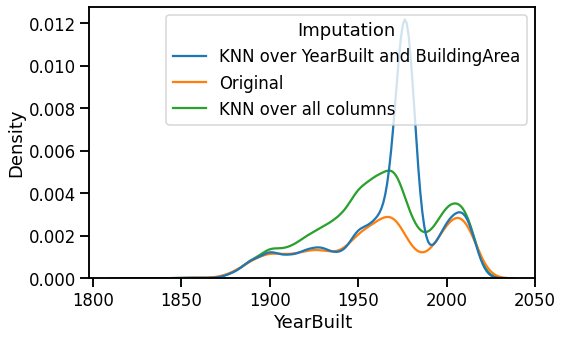

In [44]:
fig = plt.figure(figsize=(8, 5))
g = sns.kdeplot(data=data, x='YearBuilt', hue='Imputation')

In [45]:
# Imputación para BuildingArea
mice_building_area = melb_data_mice.BuildingArea.to_frame()
mice_building_area['Imputation'] = 'KNN over YearBuilt and BuildingArea'
melb_building_area = encoded_df.BuildingArea.dropna().to_frame()
melb_building_area['Imputation'] = 'Original'
mice_building_personalized = melb_data_mice_personalized.BuildingArea.to_frame()
mice_building_personalized['Imputation'] = 'KNN over all columns'
data_1 = pd.concat([mice_building_area, melb_building_area,mice_building_personalized])
data_1.reset_index(drop=False, inplace = True)
data_1.head(20)

,index,BuildingArea,Imputation
0,0,221.6,KNN over YearBuilt and BuildingArea
1,1,79.0,KNN over YearBuilt and BuildingArea
2,2,150.0,KNN over YearBuilt and BuildingArea
3,3,221.6,KNN over YearBuilt and BuildingArea
4,4,142.0,KNN over YearBuilt and BuildingArea
5,5,221.6,KNN over YearBuilt and BuildingArea
6,6,210.0,KNN over YearBuilt and BuildingArea
7,7,107.0,KNN over YearBuilt and BuildingArea
8,8,221.6,KNN over YearBuilt and BuildingArea
9,9,75.0,KNN over YearBuilt and BuildingArea


(0.0, 1000.0)

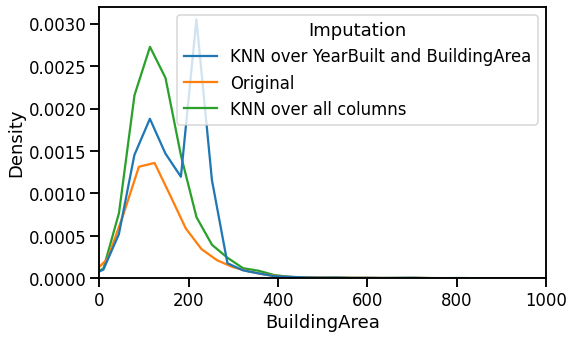

In [46]:
fig = plt.figure(figsize=(8, 5))
g = sns.kdeplot(data=data_1, x='BuildingArea', hue='Imputation')
plt.xlim([0,1000])

Para ambas variables, observamos que la imputación considerando todas las demás variables nos da valores distintos a los que obteníamos cuando solo se imputaba considerando una (adquiría valores muy puntuales).

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

**1. Aplicamos PCA**

Previamente procedemos a estandarizar los datos y para ello utilizamos MaxAbsScaler, porque los transforma tal que, el valor absoluto máximo es 1.

In [47]:
array_built = melb_data_mice[['BuildingArea','YearBuilt']].values

In [48]:
transformer = MaxAbsScaler().fit(array_built)
array_built = transformer.transform(array_built)
array_built 

array([[0.03263142, 0.97968285],
       [0.01163304, 0.94152626],
       [0.02208806, 0.94152626],
       ...,
       [0.02341334, 0.95639247],
       [0.01605066, 0.94648167],
       [0.03263142, 0.97968285]])

In [49]:
df_built = pd.DataFrame(array_built,columns=['BuildingArea','YearBuilt'])

In [50]:
melb_data_mice_personalized.drop(['BuildingArea','YearBuilt'],axis=1,inplace=True)

In [51]:
melb_data_mice_personalized = melb_data_mice_personalized.join(df_built)

In [52]:
melb_data_mice_personalized.isnull().value_counts()

CouncilArea  CouncilArea=Banyule  CouncilArea=Bayside  CouncilArea=Boroondara  CouncilArea=Brimbank  CouncilArea=Cardinia  CouncilArea=Casey  CouncilArea=Darebin  CouncilArea=Frankston  CouncilArea=Glen Eira  CouncilArea=Greater Dandenong  CouncilArea=Hobsons Bay  CouncilArea=Hume  CouncilArea=Kingston  CouncilArea=Knox  CouncilArea=Macedon Ranges  CouncilArea=Manningham  CouncilArea=Maribyrnong  CouncilArea=Maroondah  CouncilArea=Melbourne  CouncilArea=Melton  CouncilArea=Monash  CouncilArea=Moonee Valley  CouncilArea=Moreland  CouncilArea=Nillumbik  CouncilArea=Port Phillip  CouncilArea=Stonnington  CouncilArea=Unavailable  CouncilArea=Whitehorse  CouncilArea=Whittlesea  CouncilArea=Wyndham  CouncilArea=Yarra  CouncilArea=Yarra Ranges  CouncilArea=hume  CouncilArea=melton  CouncilArea=yarra ranges  Suburb=Abbotsford  Suburb=Aberfeldie  Suburb=Airport West  Suburb=Albanvale  Suburb=Albert Park  Suburb=Albion  Suburb=Alphington  Suburb=Altona  Suburb=Altona Meadows  Suburb=Altona North

In [53]:
x = melb_data_mice_personalized.values

In [54]:
x.shape[0]

7447

In [55]:
x.shape[1]

365

In [56]:
#Cambiamos shape[1] porque tomamos las columnas del vector
# Por sugerencia, dada la cantidad de variables trabajamos con n=30
n = min(30, x.shape[1])
n

30

In [57]:
np.isnan(x).any()

False

In [58]:
x

array([[0.        , 0.        , 0.        , ..., 0.26666667, 0.03263142,
        0.97968285],
       [0.        , 0.        , 0.        , ..., 0.26666667, 0.01163304,
        0.94152626],
       [0.        , 0.        , 0.        , ..., 0.26666667, 0.02208806,
        0.94152626],
       ...,
       [0.        , 0.        , 0.        , ..., 0.40740741, 0.02341334,
        0.95639247],
       [0.        , 0.        , 0.        , ..., 0.40740741, 0.01605066,
        0.94648167],
       [0.        , 0.        , 0.        , ..., 0.40740741, 0.03263142,
        0.97968285]])

In [59]:
#Para cada fila las primeras dos columnas.
x_1 = x[:,:2]


In [60]:
x_1[:,0].shape

(7447,)

In [61]:
x_1[:,1].shape

(7447,)

In [62]:
from sklearn.decomposition import PCA
x
pca = PCA(n_components=30)
pca.fit(x)
print("Principal components")
print(pca.components_)
print("Explained variance: ")
print(pca.explained_variance_)
print("Explained variance ratio")
print(pca.explained_variance_ratio_)

Principal components
[[-4.42975546e-20 -2.25338524e-02 -2.49182918e-03 ...  7.80393352e-02
  -5.58231301e-03  7.00891046e-03]
 [ 4.75318545e-17  5.53302178e-02 -1.74092619e-02 ... -2.62859402e-01
  -1.09791566e-03  1.07783811e-02]
 [-4.45602456e-17 -3.96263960e-02 -8.41213031e-02 ... -1.16041178e-01
  -3.70910807e-03 -2.83653331e-03]
 ...
 [-1.83513666e-17  1.46553873e-02 -7.49985213e-02 ... -6.44456349e-02
   1.26295763e-02  5.77230398e-03]
 [ 3.59063914e-17  9.94862172e-03  1.22448202e-02 ... -5.70293425e-02
   6.01026738e-03  5.94412816e-04]
 [ 3.41563144e-17  1.98255112e-02  6.45832388e-04 ... -3.13096223e-02
  -7.42815568e-04  4.08948548e-03]]
Explained variance: 
[0.40315238 0.14729461 0.12703569 0.11864791 0.11397936 0.10973571
 0.10254141 0.08509026 0.07841314 0.07474347 0.06836655 0.06262337
 0.05361777 0.04933326 0.0466415  0.04178292 0.03414439 0.03035495
 0.02416607 0.02338138 0.02264123 0.02102738 0.02007138 0.01833389
 0.01733299 0.0170497  0.0160712  0.01582143 0.0155825

In [63]:
np.cumsum(pca.explained_variance_ratio_ * 100)

array([15.24236102, 20.81126667, 25.6142243 , 30.10005729, 34.40938194,
       38.55826304, 42.43514237, 45.6522298 , 48.61686897, 51.44276563,
       54.02756414, 56.39522466, 58.42240221, 60.28759111, 62.05101019,
       63.6307363 , 64.92166536, 66.06932334, 66.98299272, 67.86699451,
       68.72301295, 69.51801496, 70.27687265, 70.97003912, 71.62536364,
       72.26997769, 72.87759676, 73.47577242, 74.0649145 , 74.64060492])

Text(0.5, 1.0, 'Suma acumulada de Porcentaje de varianza explicado')

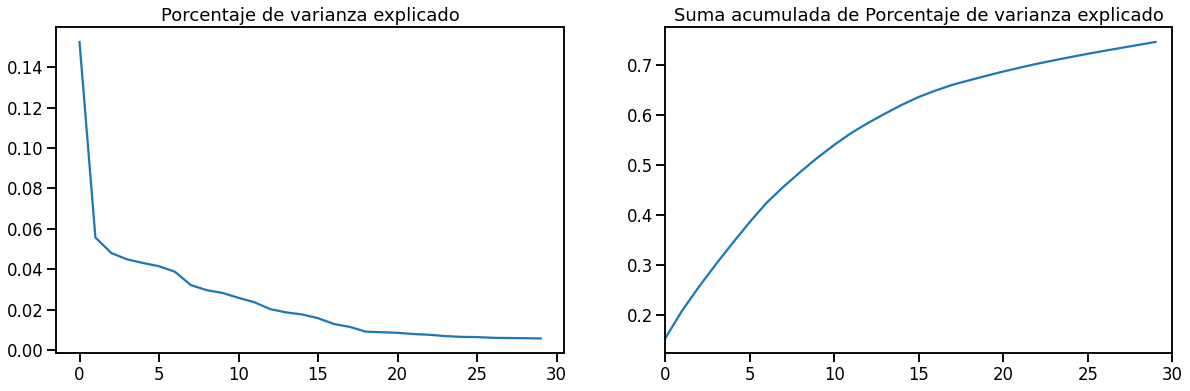

In [64]:
fig, ax = plt.subplots(1,2, figsize=(20,6))
plt.xlim([0,30])
#plt.ylim([0,.05])
sns.lineplot(data=pca.explained_variance_ratio_, ax=ax[0]).set_title("Porcentaje de varianza explicado")
sns.lineplot(data=np.cumsum(pca.explained_variance_ratio_), ax=ax[1]).set_title("Suma acumulada de Porcentaje de varianza explicado")

In [66]:
"""
np.cumsum(pca.explained_variance_ratio_ * 100)
plt.plot(pca.explained_variance_ratio_)
plt.xlim([0,30])
plt.ylim([0,.05])
"""

'\nnp.cumsum(pca.explained_variance_ratio_ * 100)\nplt.plot(pca.explained_variance_ratio_)\nplt.xlim([0,30])\nplt.ylim([0,.05])\n'

In [67]:
"""
np.cumsum(pca.explained_variance_ratio_ * 100)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim([0,30])
plt.ylim([0,1])
"""

'\nnp.cumsum(pca.explained_variance_ratio_ * 100)\nplt.plot(np.cumsum(pca.explained_variance_ratio_))\nplt.xlim([0,30])\nplt.ylim([0,1])\n'

In [68]:
x_reduced = pca.transform(x)

In [69]:
x_reduced.shape

(7447, 30)

Tomamos m = 18 porque si bien el gráfico nos muestra un quiebre muy grande en m = 1, nos parece muy poca cantidad de columnas a considerar, además sólo nos estaríamos quedando con un 15% de la información. Con 18 variables conservamos un 66%

In [70]:
x_reduced = x_reduced[:,:18]

In [71]:
x_reduced.shape

(7447, 18)

In [72]:
pca.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': 30,
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [73]:
x_reduced

array([[-3.76675455e-01, -4.60233321e-01,  4.74498809e-03, ...,
        -1.54064760e-01,  2.13848550e-01,  1.13385002e-01],
       [-3.53221218e-01, -4.43790778e-01,  2.40688038e-02, ...,
        -1.43422870e-01,  1.97868844e-01,  9.46432064e-02],
       [-3.75616833e-01, -4.65739498e-01, -3.80912491e-04, ...,
        -1.55976616e-01,  2.18630969e-01,  1.15284443e-01],
       ...,
       [-4.38067817e-01,  8.11851507e-02,  1.71058700e-01, ...,
        -5.77676047e-02,  1.51957466e-01, -9.18768783e-02],
       [-4.26596185e-01,  7.63214918e-02,  1.76632974e-01, ...,
        -6.09173009e-02,  1.51295063e-01, -1.00215015e-01],
       [-4.10061287e-01,  8.41396729e-02,  1.88618925e-01, ...,
        -5.54511282e-02,  1.42373123e-01, -1.13082155e-01]])

In [74]:
ej3 = np.hstack([x,x_reduced])

In [75]:
ej3.shape

(7447, 383)

## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [76]:
#columns_name = numpy.concatenate((melb_data_mice_personalized.columns, ['pca1', 'pca2','pca3', 'pca4','pca5', 'pca6','pca7', 'pca8','pca9', 'pca10','pca11', 'pca12','pca13', 'pca14','pca15', 'pca16','pca17', 'pca18']))

In [77]:
# generamos los nombres de las columnas nuevas en una compresión de listas
cols_names = [(str('pca'+str(i))) for i in range(18)]

In [78]:
cols_names

['pca0',
 'pca1',
 'pca2',
 'pca3',
 'pca4',
 'pca5',
 'pca6',
 'pca7',
 'pca8',
 'pca9',
 'pca10',
 'pca11',
 'pca12',
 'pca13',
 'pca14',
 'pca15',
 'pca16',
 'pca17']

In [79]:
columns_name = np.concatenate((melb_data_mice_personalized.columns, cols_names))

In [80]:
processed_melb_df = pd.DataFrame(data=ej3, columns=columns_name)
processed_melb_df.head()

,CouncilArea,CouncilArea=Banyule,CouncilArea=Bayside,CouncilArea=Boroondara,CouncilArea=Brimbank,CouncilArea=Cardinia,CouncilArea=Casey,CouncilArea=Darebin,CouncilArea=Frankston,CouncilArea=Glen Eira,...,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.647639,0.070722,0.422220,-0.114055,-0.193761,0.062018,-0.155441,-0.154065,0.213849,0.113385
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.670400,0.061538,0.418021,-0.126603,-0.195167,0.068617,-0.153747,-0.143423,0.197869,0.094643
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.649185,0.070397,0.420627,-0.115986,-0.191642,0.058283,-0.159332,-0.155977,0.218631,0.115284
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.663775,0.059883,0.422498,-0.122443,-0.195992,0.071420,-0.144967,-0.133662,0.193057,0.101816
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.635488,0.073855,0.425957,-0.106892,-0.194191,0.061295,-0.151959,-0.154310,0.217606,0.123335


## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```
